# Training an RNN to classify MNIST digits

## Creating The Recurrent Neural Network Architecture

In [1]:
import tensorflow as tf

steps   = 28
indims  = 28
neurons = 150
outdims = 10

input_layer  = tf.keras.layers.Input(shape = (steps, indims))
logits_layer = tf.keras.layers.SimpleRNN(neurons)(input_layer)
output_layer = tf.keras.layers.Dense(outdims, activation = 'softmax')(logits_layer)

rnn_model = tf.keras.Model(inputs = input_layer, outputs = output_layer)
rnn_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


## Import and Display The Dataset

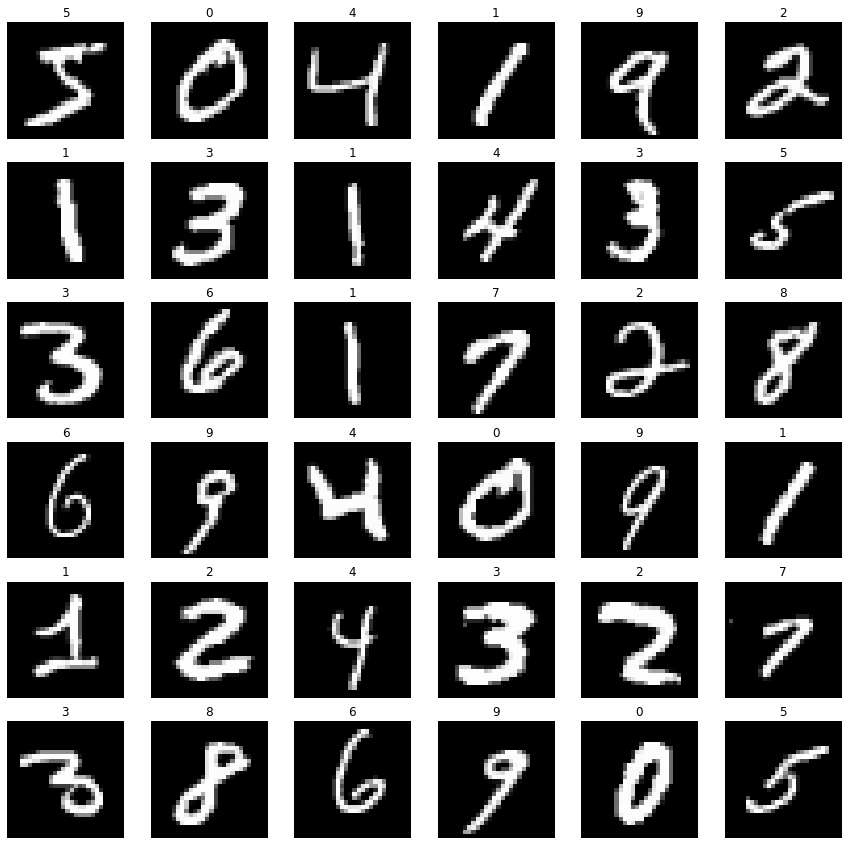

In [5]:
import matplotlib.pyplot as plt
import numpy as np

mnist_dataset = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist_dataset.load_data()
X_train, X_test = X_train / 255, X_test / 255
y_train = tf.keras.utils.to_categorical(y_train)
y_test  = tf.keras.utils.to_categorical(y_test)

fig, axes = plt.subplots(6, 6, figsize = (15, 15))

for row in range(0, 6):
    for col in range(0, 6):
        current_image = X_train[6 * row + col]
        axes[row, col].set_title(str(y_train[6 * row + col].argmax()))
        axes[row, col].axis('off')
        axes[row, col].imshow(current_image, cmap = 'gray')

plt.show()

## Training the RNN

In [3]:
train_log = rnn_model.fit(X_train, y_train, epochs = 5, batch_size = 150, validation_split = 0.2, verbose = 0)
_, rnn_model_accuracy = rnn_model.evaluate(X_test, y_test, verbose = 0)
print("accuracy: ", rnn_model_accuracy)

accuracy:  0.9603


## Plotting the Results

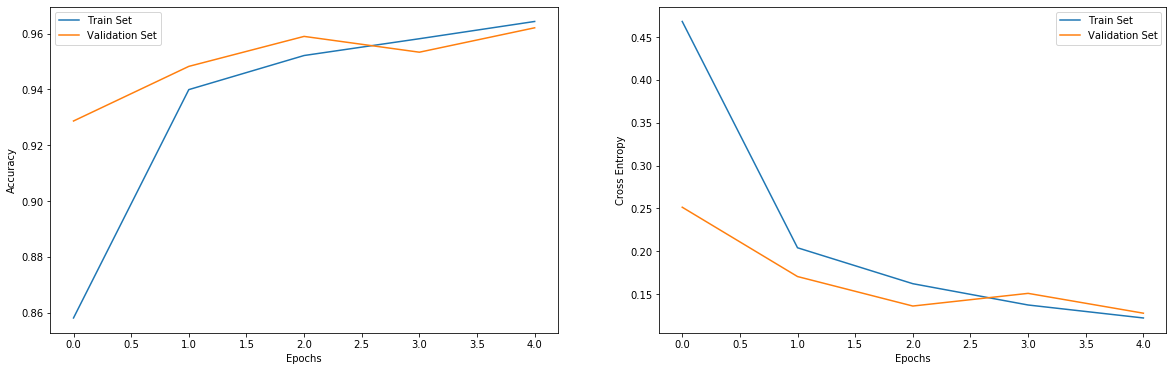

In [4]:
fig = plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
plt.plot([i for i in range(5)], train_log.history['accuracy'], label = 'Train Set')
plt.plot([i for i in range(5)], train_log.history['val_accuracy'], label = 'Validation Set')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot([i for i in range(5)], train_log.history['loss'], label = 'Train Set')
plt.plot([i for i in range(5)], train_log.history['val_loss'], label = 'Validation Set')
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.legend()

plt.show()